<h2> Bolt IOT meets Quantum</h2>

<h2> Superdense Coding </h2>
<p>Superdense Coding is an Quantum protocol .This file demonstrates Superdense Coding using classical protocols (MQTT,HTTP)</p>
You can refer to : <a href="https://qiskit.org/textbook/ch-algorithms/superdense-coding.html" > Qiskit_Book</a>


In [1]:
from boltiot import Bolt
from qiskit import *

In [2]:
%matplotlib inline

In [3]:
#Device Credentials
api_key ="XXXXXXXXXXXXXXXXXXXXXXXXX" #BOLT CLoud api_key
device_id  = "BOLTXXXXXXXX"  #BOLT Device id
mybolt = Bolt(api_key, device_id)

<h2> Entangling qubits(Charlie) </h2>

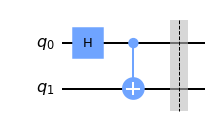

In [4]:
circuit =QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.barrier()
circuit.draw(output='mpl')

<h2> Transmitting Message (Alice) </h2>

In [5]:
#Message to transmit
classical_msg='11'

In [6]:
#Making circuit and Transmitting message as accord with protocol.
if classical_msg=='01':
    circuit.x(0)
    mybolt.digitalWrite('0','HIGH')
    mybolt.digitalWrite('1','LOW')
elif classical_msg=='10':
    circuit.z(0)
    mybolt.digitalWrite('0','LOW')
    mybolt.digitalWrite('1','HIGH')
elif classical_msg=='11':
    circuit.z(0)
    circuit.x(0)
    mybolt.digitalWrite('0','HIGH')
    mybolt.digitalWrite('1','HIGH')
else:
    circuit.i(0)
    mybolt.digitalWrite('0','LOW')
    mybolt.digitalWrite('1','LOW')

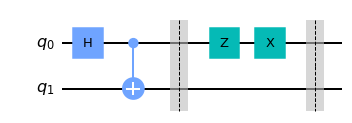

In [7]:
circuit.barrier()
circuit.draw(output='mpl')

<h2>Receiving message (Bob) </h2>

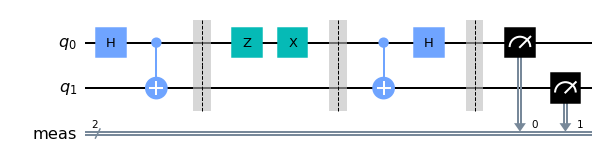

In [8]:
# Receiving Message and measurinig it.
circuit.cx(0,1)
circuit.h(0)
circuit.measure_all()
circuit.draw(output='mpl')

<h2>Visualization</h2>

In [9]:
from qiskit.tools.visualization import plot_histogram

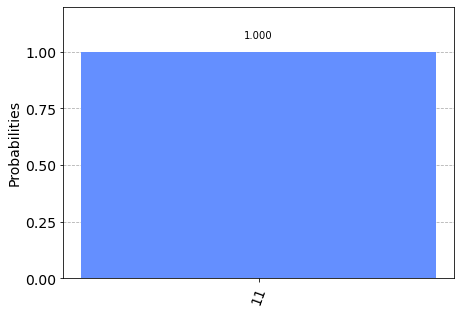

In [10]:
simulator=Aer.get_backend('qasm_simulator')
results =execute(circuit,backend=simulator ,shots=1024).result()
counts=results.get_counts(circuit)
plot_histogram(counts)

<h3><b> NOTE:</b> There is  a difference between MSB and LSB convention of Qiskit and digital electronics. I have used digital electronics convention </h3>

In [11]:
#State which have high probability will be decoded as recieved message.
max_counts =max(counts)
#Changing LED states as per received message
if max_counts=='01':
    mybolt.digitalWrite('0','LOW')
    mybolt.digitalWrite('1','HIGH')
elif max_counts=='10':
    mybolt.digitalWrite('0','HIGH')
    mybolt.digitalWrite('1','LOW')
elif max_counts=='11':
    mybolt.digitalWrite('0','HIGH')
    mybolt.digitalWrite('1','HIGH')
else:
    mybolt.digitalWrite('0','LOW')
    mybolt.digitalWrite('1','LOW')

In [12]:
#Switching OFF LEDS
mybolt.digitalWrite('1','LOW')
mybolt.digitalWrite('0','LOW')


'{"success": "0", "message": "A Connection error occurred"}'